<a href="https://colab.research.google.com/github/rohitkhadka1/AI-ML-DS/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [36]:
df = yf.download("GOOGL", start = '2014-12-12', end = '2024-09-30')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-12,26.3720,26.612000,26.073000,26.075500,26.011093,47314000
2014-12-15,26.1880,26.268499,25.770000,25.792000,25.728292,52352000
2014-12-16,25.6800,25.778999,24.859501,24.908001,24.846476,86998000
2014-12-17,24.9930,25.453501,24.955500,25.322500,25.259953,72788000
2014-12-18,25.7995,25.812500,25.327999,25.731001,25.667444,77534000


In [37]:
#Last 5 rows
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-23,164.350006,165.490005,161.669998,161.850006,161.850006,24150900
2024-09-24,163.029999,163.220001,160.690002,162.289993,162.289993,23332100
2024-09-25,161.470001,162.809998,161.300003,161.490005,161.490005,18869200
2024-09-26,163.639999,164.080002,162.279999,162.729996,162.729996,20319300
2024-09-27,162.809998,165.699997,162.630005,163.949997,163.949997,21101300


In [38]:
#Number of rows and columns
df.shape

(2464, 6)

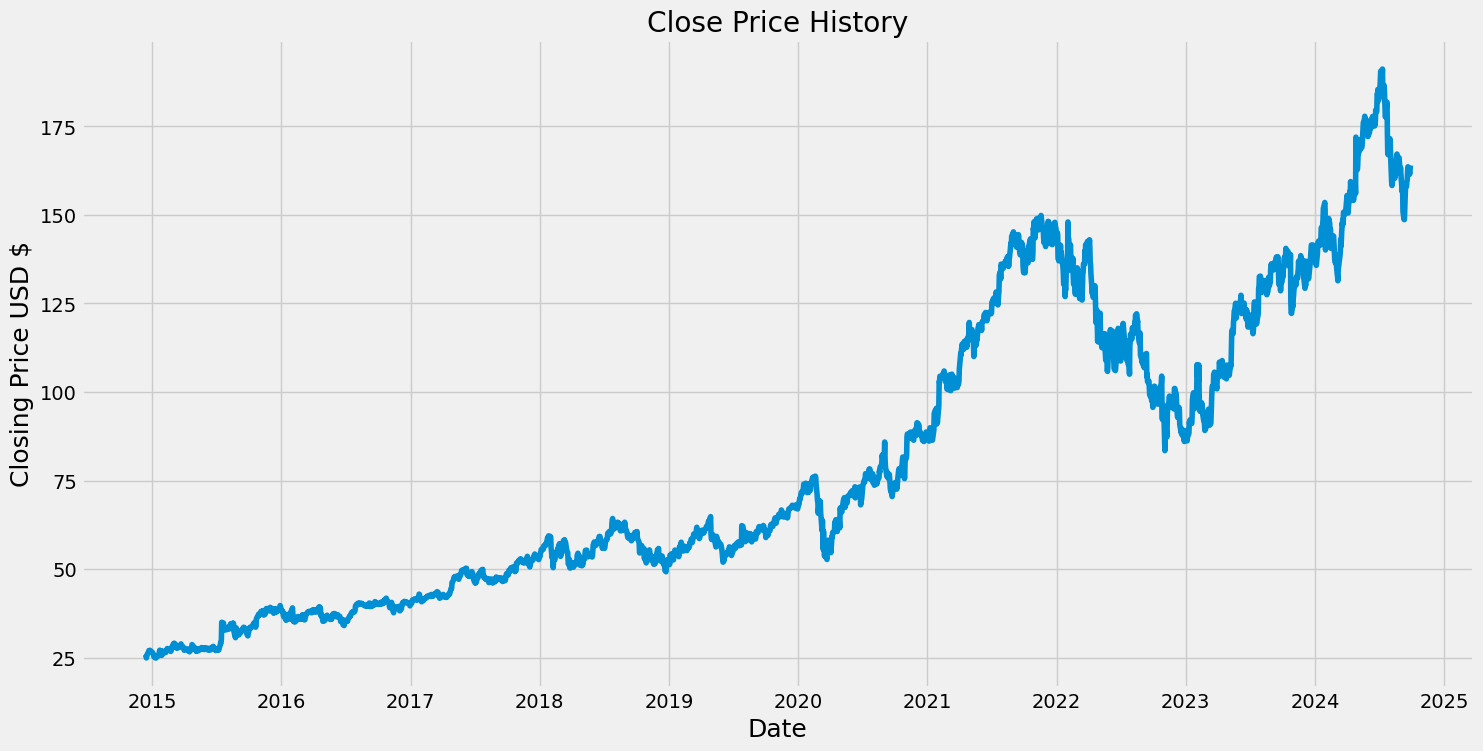

In [39]:
#Visualization
plt.figure(figsize = (16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Closing Price USD $", fontsize = 18)
plt.show()

In [40]:
data = df[['Close']]

dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len



1972

In [41]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[7.34997869e-03],
       [5.64550086e-03],
       [3.30675764e-04],
       ...,
       [8.21496278e-01],
       [8.28951413e-01],
       [8.36286369e-01]])

In [42]:
#Create the training data set
train_data = scaled_data[0: training_data_len, :]
#Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
      print(x_train)
      print(y_train)
      print()

[array([0.00734998, 0.0056455 , 0.00033068, 0.00282275, 0.00527876,
       0.00690808, 0.01059359, 0.01253855, 0.01198543, 0.01336524,
       0.01209965, 0.01148941, 0.01010059, 0.00976691, 0.00673372,
       0.00287987, 0.00243195, 0.00296104, 0.00110023, 0.        ,
       0.0014249 , 0.00266643, 0.00208926, 0.00402821, 0.00387189,
       0.00701329, 0.01209665, 0.0134945 , 0.0119223 , 0.00725378,
       0.00462041, 0.00486091, 0.01217181, 0.01056353, 0.0108942 ,
       0.00872979, 0.00985108, 0.01106856, 0.00968574, 0.0129564 ,
       0.01230708, 0.01471499, 0.01626314, 0.01441437, 0.01370493,
       0.01484726, 0.01344941, 0.01140524, 0.01250248, 0.0151118 ,
       0.01870712, 0.01971117, 0.02343576, 0.02456907, 0.02443079,
       0.02536269, 0.02279846, 0.0231592 , 0.01887547, 0.01762492])]
[0.019272275713222875]



In [43]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [44]:
#Reshaping the data as LSTM expects the input data to be three dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1912, 60, 1)

In [45]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [47]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1912/1912 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - loss: 0.0026


In [48]:
#Create the testing data set
#Create a new array  containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [49]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [50]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [51]:
#Get the model predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [52]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

3.1675274391484454

<ipython-input-53-367eab637bff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


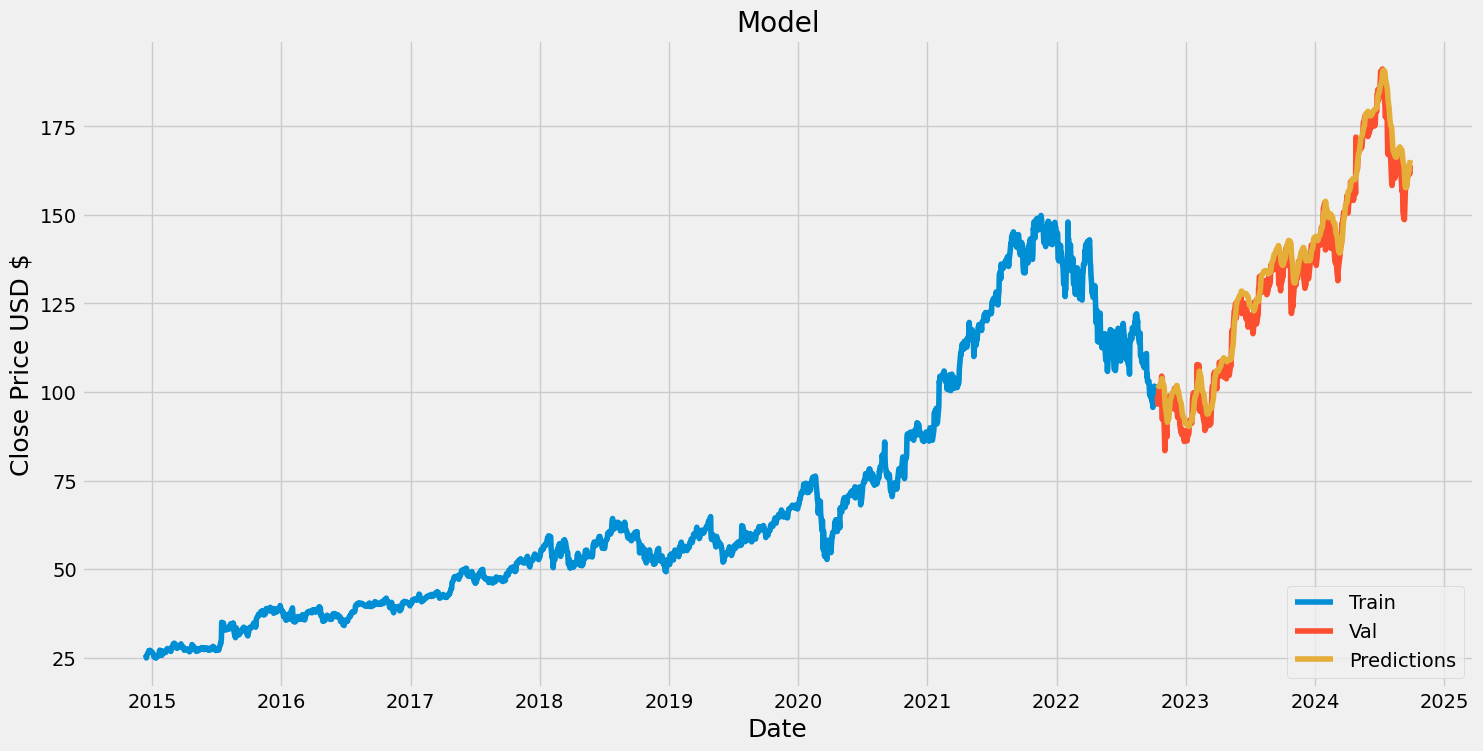

In [53]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize = (16,8))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price USD $", fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()